In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.9
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r3.9_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.9.csv", delimiter=" ")

print(menor.shape)

(8055, 4)


In [2]:


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array

    
def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    for i in range(FUTUREerror.shape[1]):
        mae.append(np.sum(a,axis=0)[i]/FUTUREerror.shape[0])
        mse.append(np.sum(b,axis=0)[i]/FUTUREerror.shape[0])
        rmse.append(np.sqrt(np.sum(b,axis=0)[i]/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse

In [3]:


future_error = []
future_error2d = []
future_error3d = []
future_error4d = []



for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 20
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])
    if error<0.1 and error>=0.01:
        future_error2d.append(prediction.flatten()-data[trainlen:trainlen+future])
    elif error<0.01 and error>=0.001:
        future_error3d.append(prediction.flatten()-data[trainlen:trainlen+future])
    elif error<0.001:
        future_error4d.append(prediction.flatten()-data[trainlen:trainlen+future])

    
    
    

0 test error: 0.052381957610221595
1 test error: 0.20104555818887868
2 test error: 0.1703987354362991
3 test error: 0.00556753302397399
4 test error: 0.15983768997885975
5 test error: 0.05017656661387524
6 test error: 0.007507149332459673
7 test error: 0.2616322513267946
8 test error: 0.11368497314589696
9 test error: 0.04252170659020999
10 test error: 0.09902172749279815
11 test error: 0.14125689646333317
12 test error: 0.1941433276863785
13 test error: 0.09166815592994133
14 test error: 0.1703616433981186
15 test error: 0.10952028257621951
16 test error: 0.039810453882724084
17 test error: 0.22427410109401436
18 test error: 0.009165505669035536
19 test error: 0.23907804736511806
20 test error: 0.033329958939924464
21 test error: 0.07978220480065472
22 test error: 0.040286504871537274
23 test error: 0.13842874939916971
24 test error: 0.15950499745800958
25 test error: 0.10859054177294493
26 test error: 0.06516945720945763
27 test error: 0.14743850411120096
28 test error: 0.21794838592

231 test error: 0.12640906521097936
232 test error: 0.009464236645191656
233 test error: 0.007903519521314347
234 test error: 0.12903596635264553
235 test error: 0.024881882932384983
236 test error: 0.07048503689948496
237 test error: 0.2609984219988789
238 test error: 0.048574886804616614
239 test error: 0.23296873072849478
240 test error: 0.054843666645337935
241 test error: 0.18271761434092915
242 test error: 0.020250340523308086
243 test error: 0.2508816887031868
244 test error: 0.2471162430888914
245 test error: 0.041277721694969384
246 test error: 0.2039259647568537
247 test error: 0.21680688697674372
248 test error: 0.028453251071182503
249 test error: 0.24408004350977094
250 test error: 0.046006322094703886
251 test error: 0.17744722923614153
252 test error: 0.040992090890739186
253 test error: 0.1398790047437368
254 test error: 0.06210435596005899
255 test error: 0.08794804243172624
256 test error: 0.0680662377892304
257 test error: 0.088120167712083
258 test error: 0.00604707

459 test error: 0.1434121515806462
460 test error: 0.11654492971125789
461 test error: 0.19980072739858734
462 test error: 0.08757667806184513
463 test error: 0.08493802034829753
464 test error: 0.07946245015276576
465 test error: 0.26859379276489703
466 test error: 0.11687987197986613
467 test error: 0.13070007396197214
468 test error: 0.24920810426823284
469 test error: 0.19448184743192656
470 test error: 0.1513091803129467
471 test error: 0.17012887191491652
472 test error: 0.015940133248654214
473 test error: 0.06254255447160031
474 test error: 0.11285640454302993
475 test error: 0.23382148169386166
476 test error: 0.18466420672281644
477 test error: 0.20813845837145858
478 test error: 0.16395794688371942
479 test error: 0.02532670998664741
480 test error: 0.1055530149743784
481 test error: 0.08409160624156804
482 test error: 0.022673412788957608
483 test error: 0.04015004599899633
484 test error: 0.2362971449479208
485 test error: 0.03541967982067301
486 test error: 0.253309942293

691 test error: 0.05434118252217718
692 test error: 0.1485528484380971
693 test error: 0.11560755828704256
694 test error: 0.25245307473858003
695 test error: 0.022987353358723046
696 test error: 0.11053026359018994
697 test error: 0.17384182539732732
698 test error: 0.18276221016956926
699 test error: 0.03630490572038696
700 test error: 0.053715657393434
701 test error: 0.10049126843777241
702 test error: 0.11006818468791714
703 test error: 0.20341451811143954
704 test error: 0.028725267369701945
705 test error: 0.01926676139519832
706 test error: 0.11572548621752109
707 test error: 0.06767876010538287
708 test error: 0.0968656499060255
709 test error: 0.0038666378666354336
710 test error: 0.10383158025554491
711 test error: 0.0201528374839641
712 test error: 0.16007202018855507
713 test error: 0.09039554887244941
714 test error: 0.07582469085873282
715 test error: 0.06625003315185894
716 test error: 0.0900325228005969
717 test error: 0.09013716643178345
718 test error: 0.220157972815

920 test error: 0.19561774795180623
921 test error: 0.059909913352729535
922 test error: 0.06677300046447215
923 test error: 0.05018475305038357
924 test error: 0.03194200929400096
925 test error: 0.020299052334643734
926 test error: 0.09148677547696109
927 test error: 0.010485418280792165
928 test error: 0.19294380094346064
929 test error: 0.12665826989962603
930 test error: 0.18407480087433067
931 test error: 0.24482593349062173
932 test error: 0.15905965630784752
933 test error: 0.2077063759349129
934 test error: 0.09476012420442695
935 test error: 0.061205120860986076
936 test error: 0.16203369978069265
937 test error: 0.20163789650638253
938 test error: 0.0307176638086699
939 test error: 0.1819255584229856
940 test error: 0.03618432080978784
941 test error: 0.22151706599862608
942 test error: 0.06683419059919626
943 test error: 0.03830980892196624
944 test error: 0.14391525720980186
945 test error: 0.10261315732556214
946 test error: 0.06337218422904412
947 test error: 0.045235071

1144 test error: 0.05186779315782253
1145 test error: 0.09299208033699995
1146 test error: 0.01156672532397706
1147 test error: 0.16907265382937017
1148 test error: 0.10817609955631849
1149 test error: 0.07794940009403961
1150 test error: 0.09360011505445359
1151 test error: 0.16142380224307662
1152 test error: 0.02698366597257318
1153 test error: 0.017572217831572538
1154 test error: 0.14833258595240534
1155 test error: 0.14051575672642724
1156 test error: 0.03959664127765752
1157 test error: 0.08222418256033265
1158 test error: 0.013494221573270185
1159 test error: 0.09247703939789577
1160 test error: 0.23162001220213796
1161 test error: 0.03990247339908828
1162 test error: 0.14218656004188612
1163 test error: 0.13998804254051497
1164 test error: 0.1256065356996918
1165 test error: 0.16100080204338707
1166 test error: 0.244989880415026
1167 test error: 0.020179244523164653
1168 test error: 0.1027071397004931
1169 test error: 0.17563349024401506
1170 test error: 0.04781080968427427
11

1370 test error: 0.016340765605138214
1371 test error: 0.07011385855126245
1372 test error: 0.008142544563088794
1373 test error: 0.08607626161018911
1374 test error: 0.14396791042270346
1375 test error: 0.11886486185859584
1376 test error: 0.03864927494841039
1377 test error: 0.14278794945507936
1378 test error: 0.006868971660111566
1379 test error: 0.14848414049189904
1380 test error: 0.04132794188641406
1381 test error: 0.1891412701428848
1382 test error: 0.20997142009462688
1383 test error: 0.08023761124250389
1384 test error: 0.13193981557556733
1385 test error: 0.0322758444690704
1386 test error: 0.04568591372702321
1387 test error: 0.058633938237198334
1388 test error: 0.0024403384764689487
1389 test error: 0.2387916656831244
1390 test error: 0.23482541670032267
1391 test error: 0.01523883947821133
1392 test error: 0.1975037653562372
1393 test error: 0.1398725191951545
1394 test error: 0.020285102740629824
1395 test error: 0.16103553484059188
1396 test error: 0.14530947600044658

1592 test error: 0.033067590071584274
1593 test error: 0.20256163903352128
1594 test error: 0.06889539396542117
1595 test error: 0.010039905091300694
1596 test error: 0.0063659806825495805
1597 test error: 0.18065386189142082
1598 test error: 0.22123321489242312
1599 test error: 0.14114977687137434
1600 test error: 0.23788045881754355
1601 test error: 0.21105850418675048
1602 test error: 0.23679122062236665
1603 test error: 0.012361754554890057
1604 test error: 0.08032138715784601
1605 test error: 0.2498939962684022
1606 test error: 0.17849303547956286
1607 test error: 0.19170672050604093
1608 test error: 0.0723488751201032
1609 test error: 0.20704733078524085
1610 test error: 0.008273325192747927
1611 test error: 0.03398421613281002
1612 test error: 0.032208197170597634
1613 test error: 0.011796975935817066
1614 test error: 0.21908702238112446
1615 test error: 0.17687930807593488
1616 test error: 0.1103717676402583
1617 test error: 0.08705876271704938
1618 test error: 0.01850337220555

1814 test error: 0.0314611459779212
1815 test error: 0.16836897830387865
1816 test error: 0.05689491028205972
1817 test error: 0.1353568462548978
1818 test error: 0.011032997380455628
1819 test error: 0.13687943495416954
1820 test error: 0.047206975526230883
1821 test error: 0.03865232914377811
1822 test error: 0.14985923549548666
1823 test error: 0.15203875893300348
1824 test error: 0.035803792495286986
1825 test error: 0.2412167520568463
1826 test error: 0.013379954441176707
1827 test error: 0.24932755378270538
1828 test error: 0.03304846738206295
1829 test error: 0.23272801304426202
1830 test error: 0.07840689319082156
1831 test error: 0.036486847276789344
1832 test error: 0.04789312021724655
1833 test error: 0.006467021423397788
1834 test error: 0.0178283246304242
1835 test error: 0.17442834196260673
1836 test error: 0.21016229884984097
1837 test error: 0.012507811986153746
1838 test error: 0.0009874226616742702
1839 test error: 0.08688128964955925
1840 test error: 0.21921157136503

2035 test error: 0.14432519308323297
2036 test error: 0.0385422896478273
2037 test error: 0.028002220389253648
2038 test error: 0.020407852430338005
2039 test error: 0.15789182988840622
2040 test error: 0.05970342386266779
2041 test error: 0.04451551776503246
2042 test error: 0.03606361637651533
2043 test error: 0.025925115200121036
2044 test error: 0.010888882272485677
2045 test error: 0.08143446492142409
2046 test error: 0.018763799599307303
2047 test error: 0.19000676923681317
2048 test error: 0.15013337198488852
2049 test error: 0.003385329900981636
2050 test error: 0.04370202097015737
2051 test error: 0.045645809892632824
2052 test error: 0.13604684579394521
2053 test error: 0.14167850534746262
2054 test error: 0.057720146354143215
2055 test error: 0.15279213762555996
2056 test error: 0.25070257782520233
2057 test error: 0.010234261655983951
2058 test error: 0.009137976380172259
2059 test error: 0.00601271344412819
2060 test error: 0.2084661708686013
2061 test error: 0.04471787251

2257 test error: 0.16551963624253124
2258 test error: 0.2551254175306955
2259 test error: 0.02149783417120958
2260 test error: 0.21507631573275904
2261 test error: 0.0183249850560942
2262 test error: 0.036317872144677465
2263 test error: 0.06587142858327727
2264 test error: 0.1826647325925284
2265 test error: 0.019881710902855742
2266 test error: 0.2141317986730052
2267 test error: 0.2529967012695623
2268 test error: 0.2467927780409167
2269 test error: 0.05287595879770054
2270 test error: 0.18769977081143346
2271 test error: 0.0027019854836121964
2272 test error: 0.0822571263590314
2273 test error: 0.10772819819946772
2274 test error: 0.09221375056396215
2275 test error: 0.07776587927365004
2276 test error: 0.02358178991317889
2277 test error: 0.14103931407097786
2278 test error: 0.08429001892821478
2279 test error: 0.047053915701013346
2280 test error: 0.1744132992344301
2281 test error: 0.23806212871726992
2282 test error: 0.21545004312779972
2283 test error: 0.026340669083175963
228

2479 test error: 0.07890378682298389
2480 test error: 0.04470556267057609
2481 test error: 0.08472178204232217
2482 test error: 0.010265959824287964
2483 test error: 0.21290339764250646
2484 test error: 0.19716565105943673
2485 test error: 0.1553211718273993
2486 test error: 0.030990605637851956
2487 test error: 0.033430772315186326
2488 test error: 0.07252533141947788
2489 test error: 0.17669962589056853
2490 test error: 0.21212282697491813
2491 test error: 0.019564731143023577
2492 test error: 0.16775327098408646
2493 test error: 0.18244740233819254
2494 test error: 0.22539199557456793
2495 test error: 0.112856753168529
2496 test error: 0.014837206687776496
2497 test error: 0.0943958898185457
2498 test error: 0.2100610100257624
2499 test error: 0.15733803489961642
2500 test error: 0.12683672278995572
2501 test error: 0.09674885959375255
2502 test error: 0.04172787127943852
2503 test error: 0.2206143142295715
2504 test error: 0.24671177272377356
2505 test error: 0.19338190842702416
25

2701 test error: 0.0713388428743331
2702 test error: 0.06793141048675072
2703 test error: 0.0028176035801426077
2704 test error: 0.11614702534747534
2705 test error: 0.040006764199848346
2706 test error: 0.13526892946896493
2707 test error: 0.25201778485976817
2708 test error: 0.07522250695827992
2709 test error: 0.24331589626017125
2710 test error: 0.020617307380128902
2711 test error: 0.05280130227163698
2712 test error: 0.15562067838205024
2713 test error: 0.06359197914732963
2714 test error: 0.13130888811214916
2715 test error: 0.1215597304205043
2716 test error: 0.09193298357898708
2717 test error: 0.09281325119527917
2718 test error: 0.09005000317845564
2719 test error: 0.04796249375637842
2720 test error: 0.07608611074267314
2721 test error: 0.2136712211637631
2722 test error: 0.01831283739222598
2723 test error: 0.07388871012770003
2724 test error: 0.046857026143986125
2725 test error: 0.03775212357097203
2726 test error: 0.007328353860455294
2727 test error: 0.0524482046114604

2923 test error: 0.18395394187379557
2924 test error: 0.2438702006658877
2925 test error: 0.06507897301823035
2926 test error: 0.05217229104461791
2927 test error: 0.041169639858925494
2928 test error: 0.1594237371304746
2929 test error: 0.06424420724941975
2930 test error: 0.02380731293654801
2931 test error: 0.107905478696972
2932 test error: 0.019756077686536026
2933 test error: 0.1400260412373205
2934 test error: 0.23310550367239352
2935 test error: 0.04136668508887877
2936 test error: 0.19243978188343583
2937 test error: 0.1024092764447446
2938 test error: 0.037073611570663245
2939 test error: 0.10706826598041252
2940 test error: 0.10309982272417566
2941 test error: 0.06455135198275298
2942 test error: 0.07759983842743699
2943 test error: 0.013751476231812184
2944 test error: 0.23785881309214413
2945 test error: 0.05785180726542678
2946 test error: 0.24502273518566756
2947 test error: 0.04872354779111678
2948 test error: 0.010519904596623098
2949 test error: 0.0995273103485822
295

3145 test error: 0.024341255440869892
3146 test error: 0.048427180033370695
3147 test error: 0.15931925771625977
3148 test error: 0.1100384854153848
3149 test error: 0.09719964434253014
3150 test error: 0.06977167496802769
3151 test error: 0.07670937860106157
3152 test error: 0.22116397575842403
3153 test error: 0.09304254845201665
3154 test error: 0.10963321318268818
3155 test error: 0.11051942912964859
3156 test error: 0.18006129770988508
3157 test error: 0.03407919775812136
3158 test error: 0.04890371455975327
3159 test error: 0.10475238804197201
3160 test error: 0.24046099414691371
3161 test error: 0.18322239476660662
3162 test error: 0.1633346628726709
3163 test error: 0.031188466472827293
3164 test error: 0.18406401191866203
3165 test error: 0.18386593668188014
3166 test error: 0.10845470816450775
3167 test error: 0.08111284513893062
3168 test error: 0.03279015175699167
3169 test error: 0.1904010397911539
3170 test error: 0.19936678978092737
3171 test error: 0.002753042267854753


3367 test error: 0.07217393444552281
3368 test error: 0.028243214409036665
3369 test error: 0.15711690092006153
3370 test error: 0.11067225402747802
3371 test error: 0.08623014154745474
3372 test error: 0.09904267802924026
3373 test error: 0.0657058884114561
3374 test error: 0.0624011225592251
3375 test error: 0.0645583584732404
3376 test error: 0.008990176192212262
3377 test error: 0.05731824928462162
3378 test error: 0.025584990975773
3379 test error: 0.1148752702937545
3380 test error: 0.17039578135065095
3381 test error: 0.05487796624341068
3382 test error: 0.22686189641417426
3383 test error: 0.13335058535636976
3384 test error: 0.03570547897783998
3385 test error: 0.05306035287081339
3386 test error: 0.0423627680826728
3387 test error: 0.10068703381138486
3388 test error: 0.07960166209953631
3389 test error: 0.07498552307979633
3390 test error: 0.02008708087036467
3391 test error: 0.2427873868856077
3392 test error: 0.05548771130507417
3393 test error: 0.05781990554958617
3394 te

3589 test error: 0.020689154982262207
3590 test error: 0.1282799911528138
3591 test error: 0.2390248798387486
3592 test error: 0.2652404734874983
3593 test error: 0.05063613947875766
3594 test error: 0.0619717903240156
3595 test error: 0.23344613302944628
3596 test error: 0.08325256860724754
3597 test error: 0.1680476837565534
3598 test error: 0.031253283871343844
3599 test error: 0.12376557347772292
3600 test error: 0.15630737240254994
3601 test error: 0.021444701421935938
3602 test error: 0.09812415519747318
3603 test error: 0.12506024860578926
3604 test error: 0.055333448319728196
3605 test error: 0.02658806841038504
3606 test error: 0.17228148899400406
3607 test error: 0.11985993716436348
3608 test error: 0.11422376604637216
3609 test error: 0.1271043293887344
3610 test error: 0.0067071015802470215
3611 test error: 0.16750841570250896
3612 test error: 0.1276618065345132
3613 test error: 0.07865718159602496
3614 test error: 0.056546552347184
3615 test error: 0.029760042573064093
361

3813 test error: 0.06307890628272615
3814 test error: 0.1269776088946391
3815 test error: 0.13087823725766562
3816 test error: 0.003909934792589798
3817 test error: 0.15273326592631117
3818 test error: 0.24198655995889823
3819 test error: 0.22505064170131311
3820 test error: 0.19217203264484573
3821 test error: 0.22485570780519398
3822 test error: 0.044550669577877657
3823 test error: 0.24172621447753023
3824 test error: 0.18438208804463008
3825 test error: 0.0410532204434403
3826 test error: 0.10167071770952427
3827 test error: 0.10126111915650665
3828 test error: 0.013744151383921883
3829 test error: 0.05467960609205698
3830 test error: 0.06535935874127731
3831 test error: 0.02755654019365665
3832 test error: 0.23867504047348997
3833 test error: 0.2615978499807283
3834 test error: 0.005831909026818481
3835 test error: 0.09119690313617888
3836 test error: 0.11865243003049046
3837 test error: 0.11402036420188655
3838 test error: 0.2385120601314024
3839 test error: 0.029321926302535203


4037 test error: 0.03635256119835171
4038 test error: 0.18653904969719867
4039 test error: 0.19277549548397294
4040 test error: 0.03321625640450663
4041 test error: 0.19004259933247317
4042 test error: 0.006137278405045388
4043 test error: 0.09586425580252025
4044 test error: 0.06808128443415534
4045 test error: 0.035872364687324444
4046 test error: 0.08473329561366258
4047 test error: 0.16237871376650875
4048 test error: 0.21359805958055378
4049 test error: 0.20061616680718436
4050 test error: 0.1081157814980704
4051 test error: 0.03188297191524786
4052 test error: 0.09747006499597477
4053 test error: 0.2732169134710673
4054 test error: 0.06345281868248662
4055 test error: 0.11093190804879526
4056 test error: 0.03542234001502903
4057 test error: 0.13984078417323528
4058 test error: 0.01482798223404681
4059 test error: 0.008741755419183421
4060 test error: 0.14742986566464839
4061 test error: 0.07382297302508473
4062 test error: 0.049361604681181594
4063 test error: 0.01836774506364601

4259 test error: 0.03591119141377314
4260 test error: 0.07444003496514165
4261 test error: 0.09159814980970629
4262 test error: 0.008989378011867805
4263 test error: 0.05753368490836857
4264 test error: 0.05626454586145862
4265 test error: 0.23576594072924348
4266 test error: 0.014725617386050929
4267 test error: 0.14571598868732102
4268 test error: 0.19840246213899249
4269 test error: 0.07894677666633257
4270 test error: 0.1399973966492885
4271 test error: 0.09334260856299212
4272 test error: 0.0030171450832747098
4273 test error: 0.08314674072871854
4274 test error: 0.036124919825835336
4275 test error: 0.01296516169733217
4276 test error: 0.023996266653946215
4277 test error: 0.16873934863870124
4278 test error: 0.23768910821823624
4279 test error: 0.10875559981244123
4280 test error: 0.027779673035904055
4281 test error: 0.08441764807097656
4282 test error: 0.1953525350830108
4283 test error: 0.035973698288748024
4284 test error: 0.1895181691138123
4285 test error: 0.15584536030136

4486 test error: 0.08188176012615166
4487 test error: 0.02638097260150701
4488 test error: 0.04139216114370494
4489 test error: 0.22939424714867465
4490 test error: 0.013455264625543938
4491 test error: 0.16128838657929945
4492 test error: 0.18973432918024138
4493 test error: 0.10779550946117523
4494 test error: 0.005359808436839677
4495 test error: 0.2502427845308282
4496 test error: 0.021551159615085892
4497 test error: 0.060630529905481456
4498 test error: 0.17122729466347902
4499 test error: 0.1533918091523135
4500 test error: 0.10335475859174353
4501 test error: 0.00490041103814987
4502 test error: 0.09690072150938249
4503 test error: 0.03570093609848091
4504 test error: 0.01269691484585764
4505 test error: 0.21444727826439092
4506 test error: 0.2086042297479992
4507 test error: 0.08658930040846866
4508 test error: 0.11036577453009776
4509 test error: 0.15360929526041453
4510 test error: 0.06098309240622637
4511 test error: 0.16578847231720284
4512 test error: 0.11660322048010335


4708 test error: 0.09569030665688968
4709 test error: 0.027969362427370754
4710 test error: 0.18050457511551782
4711 test error: 0.09550405844132233
4712 test error: 0.03669144504476029
4713 test error: 0.09495317152717186
4714 test error: 0.20870168118862806
4715 test error: 0.0905460332782245
4716 test error: 0.07849707219427551
4717 test error: 0.22565237839443983
4718 test error: 0.10714173770309725
4719 test error: 0.1987935287359045
4720 test error: 0.2413720161139766
4721 test error: 0.07318380743771896
4722 test error: 0.22087454578099783
4723 test error: 0.24902319117424326
4724 test error: 0.11207017032285302
4725 test error: 0.03928099896247981
4726 test error: 0.1405100771681339
4727 test error: 0.004935672196021153
4728 test error: 0.1161664306735292
4729 test error: 0.12649585468183203
4730 test error: 0.04067546722406107
4731 test error: 0.039456766498887845
4732 test error: 0.0729173424270053
4733 test error: 0.14149182683148132
4734 test error: 0.2276918651894881
4735 

4930 test error: 0.1080498498247046
4931 test error: 0.017303902792624382
4932 test error: 0.10555608858502198
4933 test error: 0.21967674637115694
4934 test error: 0.017754071013821076
4935 test error: 0.1885023518669793
4936 test error: 0.24757918559339834
4937 test error: 0.03492290436645642
4938 test error: 0.04985775150869873
4939 test error: 0.1744164265027524
4940 test error: 0.14304558977240384
4941 test error: 0.006818591243007714
4942 test error: 0.007625261155459122
4943 test error: 0.2216436403731711
4944 test error: 0.023882835917374456
4945 test error: 0.13767650902449
4946 test error: 0.1832280252466832
4947 test error: 0.06692576202230806
4948 test error: 0.1382996448110437
4949 test error: 0.0996633639988176
4950 test error: 0.16120962508154346
4951 test error: 0.18187026198415066
4952 test error: 0.05049386981208088
4953 test error: 0.013170100704002078
4954 test error: 0.2235676507076734
4955 test error: 0.0631143994112864
4956 test error: 0.13652879395477585
4957 te

5155 test error: 0.1489016824975533
5156 test error: 0.0930735508327457
5157 test error: 0.18547715130823292
5158 test error: 0.015432401857464995
5159 test error: 0.18636707830881716
5160 test error: 0.029481309654273247
5161 test error: 0.23040590957432092
5162 test error: 0.044657479821172734
5163 test error: 0.22243348116385925
5164 test error: 0.18235001515955748
5165 test error: 0.047995527588827566
5166 test error: 0.01119147779677738
5167 test error: 0.1091419565297633
5168 test error: 0.029748532005046468
5169 test error: 0.17300377109745807
5170 test error: 0.022286178724605556
5171 test error: 0.0036674581091389984
5172 test error: 0.05528478957824548
5173 test error: 0.024491879334728874
5174 test error: 0.03779630262157455
5175 test error: 0.0017673929730340522
5176 test error: 0.15362569909058887
5177 test error: 0.10381089518553975
5178 test error: 0.1786630191888422
5179 test error: 0.16749552663981385
5180 test error: 0.17268200487258467
5181 test error: 0.081871244226

5377 test error: 0.10554782454018008
5378 test error: 0.07385484731164933
5379 test error: 0.23676526360157912
5380 test error: 0.0863554793000956
5381 test error: 0.17710697188150099
5382 test error: 0.20786705686802048
5383 test error: 0.07429519932715568
5384 test error: 0.22738100118872318
5385 test error: 0.03623504261541255
5386 test error: 0.14750437241607714
5387 test error: 0.07051693561118107
5388 test error: 0.06556827118178084
5389 test error: 0.12372833511475671
5390 test error: 0.18115078567429016
5391 test error: 0.2407038914074362
5392 test error: 0.1247872418276627
5393 test error: 0.030428405956358134
5394 test error: 0.21988935003742263
5395 test error: 0.015274521795868131
5396 test error: 0.2015107464764042
5397 test error: 0.13998046947539283
5398 test error: 0.06865097652048095
5399 test error: 0.01629408637780244
5400 test error: 0.17550559529665868
5401 test error: 0.02659308811743595
5402 test error: 0.11670645364778393
5403 test error: 0.030132508014396115
54

5600 test error: 0.042549361766681316
5601 test error: 0.18781696865208433
5602 test error: 0.0343580016080563
5603 test error: 0.23619156861951635
5604 test error: 0.1636220362109594
5605 test error: 0.025335853357975488
5606 test error: 0.05737815874565398
5607 test error: 0.00846724277405808
5608 test error: 0.020279539362410993
5609 test error: 0.1591039595167599
5610 test error: 0.18557135909434813
5611 test error: 0.06415865079455295
5612 test error: 0.10193920055552583
5613 test error: 0.15528114953950656
5614 test error: 0.1383994530144903
5615 test error: 0.26027132255979846
5616 test error: 0.23419180663759384
5617 test error: 0.04111980879474204
5618 test error: 0.18436862487919392
5619 test error: 0.09105478357162458
5620 test error: 0.03703010635705646
5621 test error: 0.2394305837076655
5622 test error: 0.2516149837569064
5623 test error: 0.05935530504832858
5624 test error: 0.12467437156233506
5625 test error: 0.07920287710790648
5626 test error: 0.0702058988217598
5627 

5822 test error: 0.20522355224760327
5823 test error: 0.05984942566358028
5824 test error: 0.2416519183126734
5825 test error: 0.06265603533960852
5826 test error: 0.185459256236222
5827 test error: 0.1380746697553275
5828 test error: 0.0031324479953192914
5829 test error: 0.013395055616107989
5830 test error: 0.008571363422026584
5831 test error: 0.20011549812630594
5832 test error: 0.0445402246682815
5833 test error: 0.008139384754714634
5834 test error: 0.06727348593581531
5835 test error: 0.16143258718401937
5836 test error: 0.0024546628668638804
5837 test error: 0.2337453372848574
5838 test error: 0.09757724443948318
5839 test error: 0.19511954766119624
5840 test error: 0.14101496238088077
5841 test error: 0.03909771109720508
5842 test error: 0.05545764609272633
5843 test error: 0.048716185671858536
5844 test error: 0.20425819939041034
5845 test error: 0.2506008124699625
5846 test error: 0.24416489412019826
5847 test error: 0.03527074337328686
5848 test error: 0.027972575101366363

6045 test error: 0.1721041090837899
6046 test error: 0.06283330656322762
6047 test error: 0.06869937259199457
6048 test error: 0.13965823327902324
6049 test error: 0.08727756011354112
6050 test error: 0.01695603424801218
6051 test error: 0.02066601807785541
6052 test error: 0.0046705144989278614
6053 test error: 0.09970522507951932
6054 test error: 0.1301912042579641
6055 test error: 0.12183783502781646
6056 test error: 0.00931709527587797
6057 test error: 0.0030412147851972475
6058 test error: 0.11830099854078967
6059 test error: 0.06763964009789498
6060 test error: 0.23824798432825126
6061 test error: 0.034617191776358774
6062 test error: 0.022313199497469044
6063 test error: 0.033778191476231
6064 test error: 0.1618180936547805
6065 test error: 0.04270448527526382
6066 test error: 0.17006233119528216
6067 test error: 0.24746139860373867
6068 test error: 0.032601600775353005
6069 test error: 0.1724440123614575
6070 test error: 0.030207179896980067
6071 test error: 0.03344957078866533

6267 test error: 0.031296763056714756
6268 test error: 0.020312440771155595
6269 test error: 0.24865894940806016
6270 test error: 0.22844916778892546
6271 test error: 0.27788620721821816
6272 test error: 0.004122704414380315
6273 test error: 0.2274515627352127
6274 test error: 0.0425482120395531
6275 test error: 0.1970616047704369
6276 test error: 0.12284057637139109
6277 test error: 0.08968935816672599
6278 test error: 0.07983280528804641
6279 test error: 0.2760859676007275
6280 test error: 0.12323806360175145
6281 test error: 0.1537145956130624
6282 test error: 0.22412797609069646
6283 test error: 0.1584729908878676
6284 test error: 0.11928391615224689
6285 test error: 0.0385713326002883
6286 test error: 0.06964932994137092
6287 test error: 0.196013617276902
6288 test error: 0.033920353748350014
6289 test error: 0.015616116151101297
6290 test error: 0.03688764662148211
6291 test error: 0.0642988791452569
6292 test error: 0.04968882822639899
6293 test error: 0.1474253577600964
6294 te

6490 test error: 0.02596725356723114
6491 test error: 0.09641619952283184
6492 test error: 0.23219096961810748
6493 test error: 0.050227534964635445
6494 test error: 0.12337617935250351
6495 test error: 0.059771610511958395
6496 test error: 0.026466264358992762
6497 test error: 0.1625310183272701
6498 test error: 0.23566929467034137
6499 test error: 0.045930688204856754
6500 test error: 0.0035509207475850875
6501 test error: 0.04280550839504833
6502 test error: 0.055506896843737816
6503 test error: 0.23572018323410227
6504 test error: 0.19574363623343674
6505 test error: 0.012044799731124356
6506 test error: 0.13033214521600087
6507 test error: 0.04569535147368927
6508 test error: 0.061921513359430566
6509 test error: 0.08421647561063281
6510 test error: 0.19153050178579423
6511 test error: 0.03451649268544154
6512 test error: 0.2520910317858953
6513 test error: 0.15178593412445632
6514 test error: 0.09108389878792073
6515 test error: 0.013145868064965947
6516 test error: 0.25411050371

6713 test error: 0.05559142221316462
6714 test error: 0.07147753813684116
6715 test error: 0.024078448073862137
6716 test error: 0.22385591370289135
6717 test error: 0.09131780128113151
6718 test error: 0.11331508801222896
6719 test error: 0.029736852902987075
6720 test error: 0.12089810458837622
6721 test error: 0.22004734282861832
6722 test error: 0.09540289127337094
6723 test error: 0.12660528409288907
6724 test error: 0.1937170268301136
6725 test error: 0.023390152738599075
6726 test error: 0.04260369871319067
6727 test error: 0.07357722683715752
6728 test error: 0.17033483191551943
6729 test error: 0.0682476429986954
6730 test error: 0.0619884539209772
6731 test error: 0.06373349100916628
6732 test error: 0.06987452218661595
6733 test error: 0.03100991137114323
6734 test error: 0.2513452710003101
6735 test error: 0.057027078072310174
6736 test error: 0.10722843651786063
6737 test error: 0.014565515137973573
6738 test error: 0.07692836668884802
6739 test error: 0.23622998800471562


6936 test error: 0.16246595647110304
6937 test error: 0.16273305161230467
6938 test error: 0.02985749383810584
6939 test error: 0.1463915206987983
6940 test error: 0.09287168684396074
6941 test error: 0.07048299140947978
6942 test error: 0.11356204416442929
6943 test error: 0.06132173078459105
6944 test error: 0.08140916095350192
6945 test error: 0.1364177604668583
6946 test error: 0.1480474578660236
6947 test error: 0.056411758936605536
6948 test error: 0.117190449948002
6949 test error: 0.08077719632148304
6950 test error: 0.03457225681757194
6951 test error: 0.033543313499413314
6952 test error: 0.004260996295496285
6953 test error: 0.1856785307359183
6954 test error: 0.16440438263892318
6955 test error: 0.08705526755672154
6956 test error: 0.039109140870124966
6957 test error: 0.20736161360144578
6958 test error: 0.033323353029630125
6959 test error: 0.09322810962754827
6960 test error: 0.1334586043278439
6961 test error: 0.08666747687872293
6962 test error: 0.13159689747316838
696

7159 test error: 0.09846306078379502
7160 test error: 0.032162891895097565
7161 test error: 0.03766026580477654
7162 test error: 0.0731751882402636
7163 test error: 0.14488686785746407
7164 test error: 0.12919713964912813
7165 test error: 0.11134900764568638
7166 test error: 0.18489014255259553
7167 test error: 0.06228966541140692
7168 test error: 0.03244490264711841
7169 test error: 0.031717780964227275
7170 test error: 0.08578004932599827
7171 test error: 0.10985944549932504
7172 test error: 0.05907734371148786
7173 test error: 0.1464920484026205
7174 test error: 0.13775733333939494
7175 test error: 0.24879027229545864
7176 test error: 0.04201814470966344
7177 test error: 0.043124625215523946
7178 test error: 0.09615672053395673
7179 test error: 0.182720327766066
7180 test error: 0.004942922750359001
7181 test error: 0.013351334518320586
7182 test error: 0.2501960040560922
7183 test error: 0.13813733399845599
7184 test error: 0.09685841786766013
7185 test error: 0.08329141223471717
7

7382 test error: 0.37185695752346826
7383 test error: 0.28947085891636015
7384 test error: 0.32742638840559346
7385 test error: 0.252518899780352
7386 test error: 0.34404925172897416
7387 test error: 0.32194040199272894
7388 test error: 0.41364688993991117
7389 test error: 0.2659836352429652
7390 test error: 0.2961521449026975
7391 test error: 0.17719501635613036
7392 test error: 0.30525340041205373
7393 test error: 0.32653549926602643
7394 test error: 0.2890169800959081
7395 test error: 0.41533428267937844
7396 test error: 0.13249646566898016
7397 test error: 0.36004045292777376
7398 test error: 0.4683753856237867
7399 test error: 0.175773313717058
7400 test error: 0.38261768777375477
7401 test error: 0.3202510487870011
7402 test error: 0.2691657090687195
7403 test error: 0.3928791363016756
7404 test error: 0.3539817195961248
7405 test error: 0.2633925429849535
7406 test error: 0.46616330513661264
7407 test error: 0.3649393977882626
7408 test error: 0.4307782321273761
7409 test error:

7608 test error: 0.2696767234698724
7609 test error: 0.3618711267635487
7610 test error: 0.3123111790332573
7611 test error: 0.3617884711448591
7612 test error: 0.3936048991692346
7613 test error: 0.3748204453949487
7614 test error: 0.2438985908351356
7615 test error: 0.3474984978393289
7616 test error: 0.380762462045303
7617 test error: 0.34914361160872165
7618 test error: 0.10254592606517783
7619 test error: 0.2615760202898893
7620 test error: 0.3964513062581374
7621 test error: 0.14074300104174087
7622 test error: 0.29872829364137427
7623 test error: 0.33369324501656633
7624 test error: 0.2491142542938644
7625 test error: 0.26687922213151555
7626 test error: 0.39316266917310877
7627 test error: 0.38928482841559475
7628 test error: 0.327655064099414
7629 test error: 0.19711414160037202
7630 test error: 0.3794468307434934
7631 test error: 0.3312079274182385
7632 test error: 0.39403219677384366
7633 test error: 0.24176509733121004
7634 test error: 0.33099517630770686
7635 test error: 0

7837 test error: 0.2530111208902073
7838 test error: 0.2590399095900361
7839 test error: 0.341524790674112
7840 test error: 0.2554309267335263
7841 test error: 0.2944351639014307
7842 test error: 0.27777633702932963
7843 test error: 0.35404178772492856
7844 test error: 0.13022676920683934
7845 test error: 0.3127147776876895
7846 test error: 0.26594949536408075
7847 test error: 0.32891658037676463
7848 test error: 0.15942017339986875
7849 test error: 0.12692838014239818
7850 test error: 0.2868304539595977
7851 test error: 0.23406341101571854
7852 test error: 0.34052714695973885
7853 test error: 0.36355934226648473
7854 test error: 0.3961706255836319
7855 test error: 0.13413474462112987
7856 test error: 0.4327356783073391
7857 test error: 0.34460345137840664
7858 test error: 0.35817318385468117
7859 test error: 0.3362353089416477
7860 test error: 0.38351548903141813
7861 test error: 0.36868672860106644
7862 test error: 0.3377461238044192
7863 test error: 0.215959823531607
7864 test error

In [4]:
FUTUREerror = turnintoarray(future_error,future)
FUTUREerror2d = turnintoarray(future_error2d,future)
FUTUREerror3d = turnintoarray(future_error3d,future)
FUTUREerror4d = turnintoarray(future_error4d,future)
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')


mae [0.0009978864323460003, 0.0013766308908996906, 0.0015746647692463033, 0.0020064325910295294, 0.0027710168794192742, 0.004232102065981435, 0.00618479662416059, 0.009478226130020227, 0.014810327172446713, 0.02075151457462547, 0.027159772725480875, 0.03400953816528599, 0.04201779742957397, 0.05195219781470705, 0.07040558360709398, 0.09794122184407411, 0.1422932897578281, 0.19615871646449218, 0.24995860180432142, 0.2904169169849217] 
 mse [1.6753383148550507e-06, 4.705576728111327e-06, 1.2421210116357327e-05, 2.851709582074662e-05, 9.898076104906695e-05, 0.00028691200517591043, 0.0007558106077322563, 0.0019360318624689395, 0.00484778947419025, 0.008082241647216723, 0.010690137078895713, 0.013164313125330358, 0.01547136077871009, 0.016063671840456074, 0.019400378744953817, 0.027118535988676452, 0.04597421217245286, 0.07731308859765663, 0.11486450752305837, 0.14231054810112692] 
 rmse [0.0012943486063866452, 0.0021692341340001377, 0.0035243737197348025, 0.00534014005628566, 0.00994890753

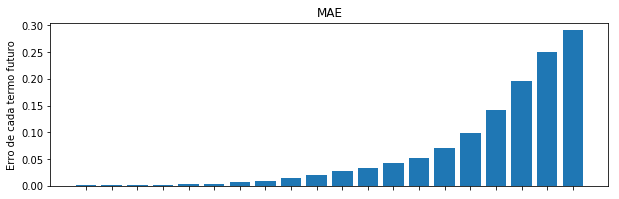

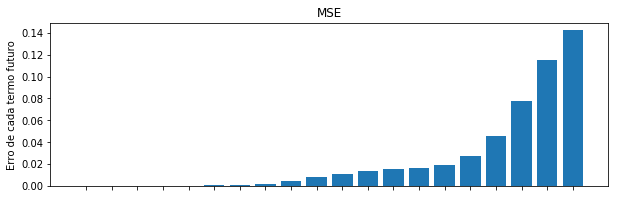

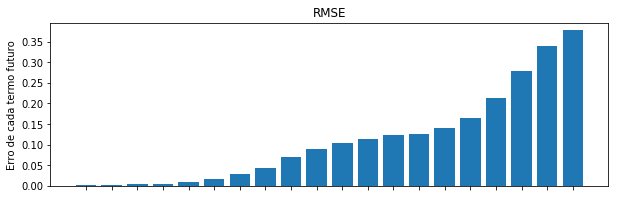

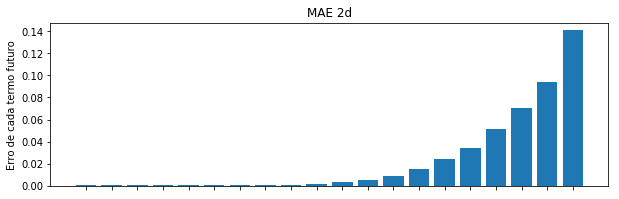

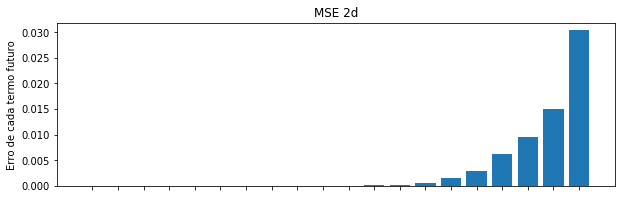

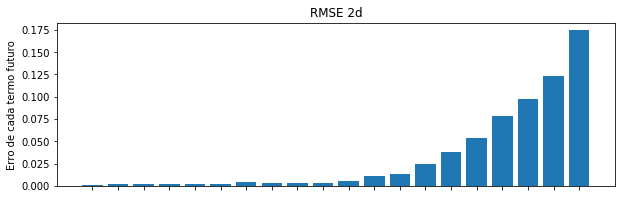

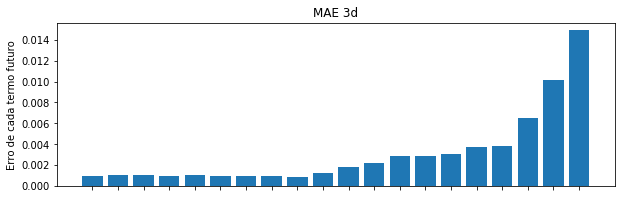

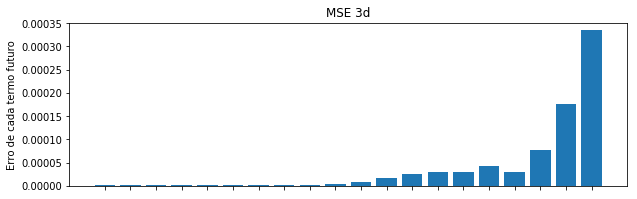

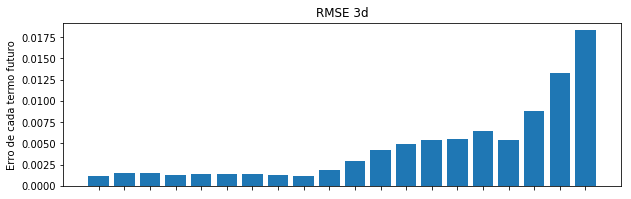

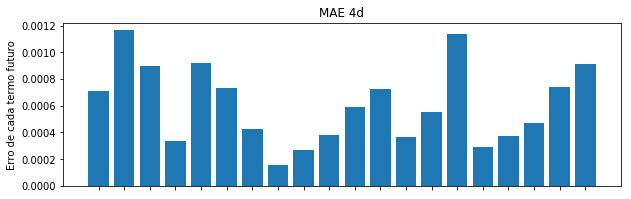

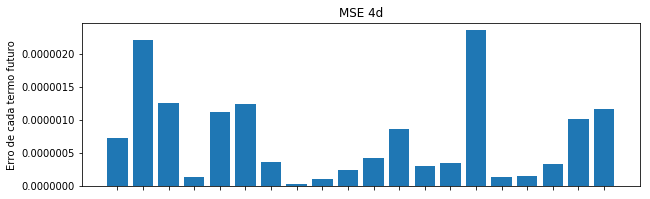

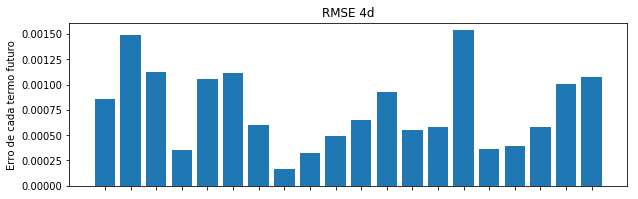

In [6]:

label = []

plt.figure(figsize=(10,3))
index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mae2d))
plt.bar(index, mae2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse2d))
plt.bar(index, mse2d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse2d))
plt.bar(index, rmse2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mae3d))
plt.bar(index, mae3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse3d))
plt.bar(index, mse3d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse3d))
plt.bar(index, rmse3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mae4d))
plt.bar(index, mae4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse4d))
plt.bar(index, mse4d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse4d))
plt.bar(index, rmse4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

    

In [7]:
future_error1d = []

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror**2
    if np.sqrt(np.sum(b[i])/20)>0.1:
        future_error1d.append(FUTUREerror)
    elif np.sqrt(np.sum(b[i])/20)<0.001:
        print(i,np.sqrt(np.sum(b[i])/20))
        
mae1d,mse1d,rmse1d = geterrors(FUTUREerror1d)

plt.figure(figsize=(10,3))
index = np.arange(len(mae4d))
plt.bar(index, mae1d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 1d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse4d))
plt.bar(index, mse1d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 1d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse4d))
plt.bar(index, rmse1d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 1d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

596 0.0008888827672460803
1838 0.0009874226616742702
2329 0.0009712260244850436
5812 0.0004928364500045598
6552 0.0008221608787733739


NameError: name 'FUTUREerror1d' is not defined